# Feature 

In [211]:
import requests as rq
import json
import numpy as np
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import snownlp
from tqdm import tqdm
from time import sleep
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from textblob import TextBlob
from snownlp import SnowNLP


<font size=6>Read file</font>

In [212]:
test = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Project/final-project/dataset/test_modified.pkl')
feat_data = 'feat_test_modified_v1'
save = True
test


,web_url,print_section,print_page,news_desk,section_name,type_of_material,word_count,subsection_name,pub_year,pub_month,...,abstract_len,abstract_dup,headline,headline_len,headline_dup,headline_kicker,len_lead,keywords,authors,n_comment
0,https://www.nytimes.com/2020/12/31/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,670,NaN,2021,1,...,18,0,Party Hearty,2,0,"Wordplay, The CROSSWORD COLUMN",74,[Crossword Puzzles],[Caitlin Lovinger],124
1,https://www.nytimes.com/2021/01/01/nyregion/ny...,A,5,Metro,New York,News,1541,NaN,2021,1,...,29,0,Virus Numbers Are Surging. Why Is New York’s V...,11,0,None,58,"[Coronavirus (2019-nCoV), Vaccination and Immu...",[Joseph Goldstein],250
2,https://www.nytimes.com/2021/01/01/well/live/n...,D,6,Well,Well,News,1322,Live,2021,1,...,19,0,"For a Healthier 2021, Keep the Best Habits of ...",13,0,Well Challenge Day 1,23,"[Content Type: Service, Habits and Routines (B...",[Tara Parker-Pope],141
3,https://www.nytimes.com/2021/01/01/nyregion/85...,MB,1,Metropolitan,New York,News,1920,NaN,2021,1,...,28,0,How the Oldest Old Can Endure Even This,8,0,None,66,"[Elderly, Nursing Homes, Retirement Communitie...",[John Leland],186
4,https://www.nytimes.com/2021/01/01/business/GE...,B,1,Business,Business Day,News,1363,NaN,2021,1,...,16,0,A Monster Wind Turbine Is Upending an Industry,8,0,None,53,"[Wind Power, Alternative and Renewable Energy,...",[Stanley Reed],475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,https://www.nytimes.com/2022/12/30/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,619,NaN,2022,12,...,11,0,Get Frothy,2,0,"Wordplay, The CROSSWORD COLUMN",100,[Crossword Puzzles],[Caitlin Lovinger],113
9991,https://www.nytimes.com/2022/12/31/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,165,NaN,2022,12,...,8,156,Spelling Bee Forum,3,156,None,64,[Spelling Bee (Game)],[],324
9992,https://www.nytimes.com/interactive/2022/12/31...,NaN,NaN,The Upshot,The Upshot,Interactive Feature,0,NaN,2022,12,...,17,0,Readers Sent Us Pandemic Photos in 2020. Here’...,13,0,None,17,"[Coronavirus (2019-nCoV), Photography, Quarant...","[Alicia Parlapiano, Emily Badger, Claire Mille...",99
9993,https://www.nytimes.com/2022/12/31/technology/...,BU,1,SundayBusiness,Technology,News,2787,NaN,2022,12,...,29,0,Your Memories. Their Cloud.,4,0,None,61,"[Computers and the Internet, Archives and Reco...",[Kashmir Hill],150


<font size=6>Set bound of popularity</font>

In [213]:
median = test['n_comment'].median()
print(median)
test['is_popular'] = test['n_comment'].apply(lambda x : 1 if x > median else 0)
#test['is_popular'] = test['n_comment'].apply(lambda x : 1 if x > 135 else 0)
pop_count = 0
for i in test['is_popular']:
    if i:
        pop_count += 1
print('popular:    ' , pop_count / len(test))
print('not popular:' , 1 - pop_count / len(test))
#test = test.drop(columns = ['n_comment'])

57.0
popular:     0.49904933453417394
not popular: 0.500950665465826


In [214]:
print(test.columns)

Index(['web_url', 'print_section', 'print_page', 'news_desk', 'section_name',
       'type_of_material', 'word_count', 'subsection_name', 'pub_year',
       'pub_month', 'pub_day', 'pub_weekday', 'pub_time', 'abstract',
       'abstract_len', 'abstract_dup', 'headline', 'headline_len',
       'headline_dup', 'headline_kicker', 'len_lead', 'keywords', 'authors',
       'n_comment', 'is_popular'],
      dtype='object')


<font size=6>Hour</font>


pub_time
0     0.690299
1     0.644928
2     0.696833
3     0.646617
4     0.230263
5     0.288889
6     0.269231
7     0.518519
8     0.512111
9     0.547144
10    0.530947
11    0.267606
12    0.385870
13    0.352941
14    0.372845
15    0.447059
16    0.481855
17    0.444759
18    0.344937
19    0.517333
20    0.462329
21    0.485944
22    0.585965
23    0.694030
Name: is_popular, dtype: float64
0.13305026623599608


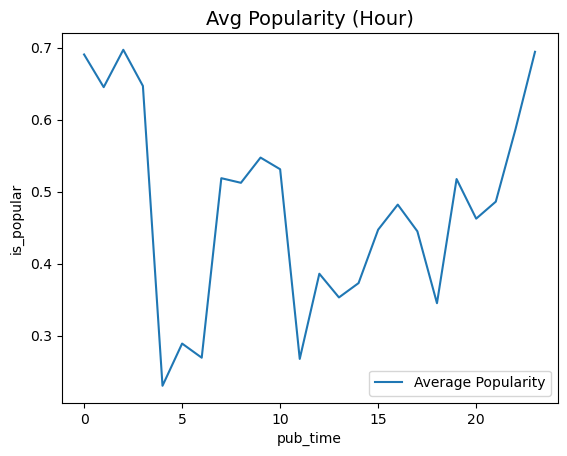

In [215]:
print(test.groupby('pub_time').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_time').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Hour)', fontsize=14)
#plt.axvline(x = 3, linestyle= '--')

test['is_noon'] = test['pub_time'].apply(lambda x : 1 if (x <= 3 or x >= 23) else 0)
print(test.corr()['is_popular']['is_noon'])

<font size=6>Weekday</font>

In [216]:
print(test.groupby('pub_weekday').mean()['is_popular'])

pub_weekday
0    0.491329
1    0.512931
2    0.458311
3    0.461214
4    0.485679
5    0.700000
6    0.573955
Name: is_popular, dtype: float64


<font size=6>Day of week</font>

0.09699438178302658


Text(0.5, 1.0, 'Avg Popularity (Day of Week)')

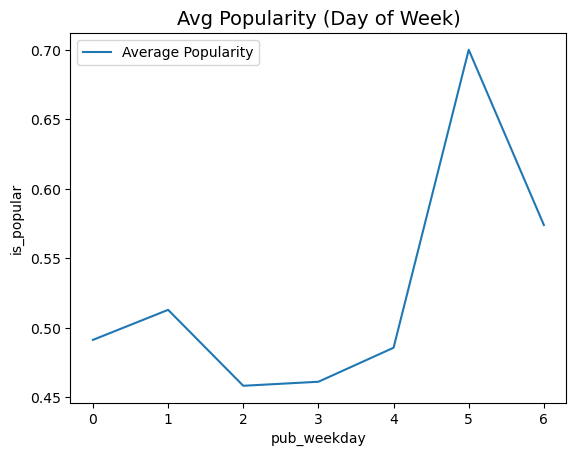

In [217]:
test['is_saturday'] = test['pub_weekday'].apply(lambda x : 1 if (x == 5) else 0)
print(test.corr()['is_popular']['is_saturday'])
sns.lineplot(data = test.groupby('pub_weekday').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Day of Week)', fontsize=14)


<font size=6>Day of month</font>

pub_day
1     0.522388
2     0.482249
3     0.517751
4     0.563107
5     0.494881
6     0.473846
7     0.509138
8     0.476038
9     0.501538
10    0.485030
11    0.506024
12    0.517143
13    0.530686
14    0.504043
15    0.470414
16    0.470948
17    0.441261
18    0.492537
19    0.455975
20    0.500000
21    0.539548
22    0.485549
23    0.513043
24    0.506803
25    0.482972
26    0.477987
27    0.490323
28    0.522255
29    0.506289
30    0.531250
31    0.514925
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (day)')

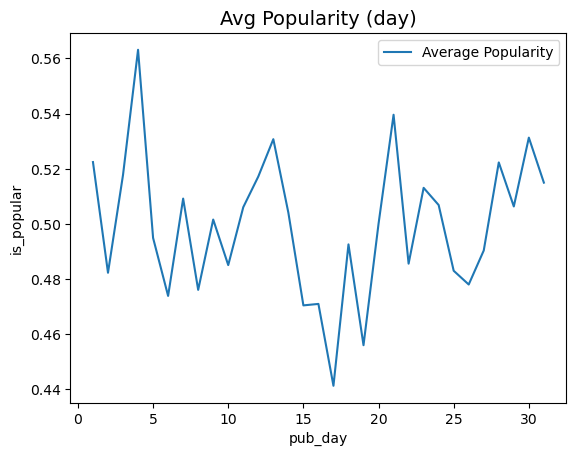

In [218]:
print(test.groupby('pub_day').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_day').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (day)', fontsize=14)

<font size=6>Month</font>

pub_month
1     0.533163
2     0.484733
3     0.426265
4     0.468009
5     0.479604
6     0.469952
7     0.522639
8     0.499376
9     0.532814
10    0.540204
11    0.520433
12    0.517661
Name: is_popular, dtype: float64
0.06974878372392414


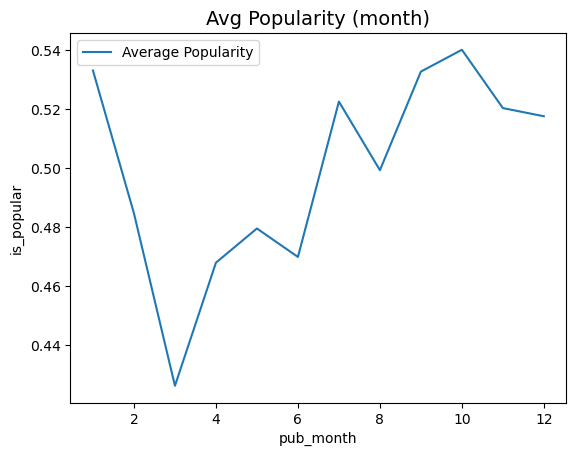

In [219]:
print(test.groupby('pub_month').mean()['is_popular'])
sns.lineplot(data = test.groupby('pub_month').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (month)', fontsize=14)
test['is_lowmonth'] = test['pub_time'].apply(lambda x : 0 if (x >= 3 and x <= 6) else 1)
print(test.corr()['is_popular']['is_lowmonth'])
#print(test.corr()['is_popular']['is_noon'])

<font size=6>News desk</font>

In [220]:
table = pd.read_pickle('./table/newsdesk_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_news_desk'] = test['news_desk'].apply(lambda x : table[x] if x in table else mean)
test['feature_news_desk'] = test['group_by_news_desk'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_news_desk'])
print(test.corr()['is_popular']['feature_news_desk'])

0.43462760144476303
0.5273695654175007
0.5246337630734181


<font size=6>Section</font>

In [221]:
table_sec = pd.read_pickle('./table/section_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_section_name'] = test['section_name'].apply(lambda x : table_sec[x] if x in table_sec else mean)
test['feature_section_name'] = test['group_by_section_name'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_section_name'])
print(test.corr()['is_popular']['feature_section_name'])

0.43462760144476303
0.5174523894007497
0.5148921114004705


<font size=6>Subsection</font>

In [222]:
table_sub = pd.read_pickle('./table/subsection_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_subsection_name'] = test['subsection_name'].apply(lambda x : table_sub[x] if x in table_sub else mean)
test['feature_subsection_name'] = test['group_by_subsection_name'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_subsection_name'])
print(test.corr()['is_popular']['feature_subsection_name'])

0.43462760144476303
0.31679707077182134
0.3036709079907287


<font size=6>Material</font>

In [223]:
table_mat = pd.read_pickle('./table/material_modified.pkl')
mean = 0
for i in table.values():
    mean += i
mean /= len(table)
print(mean)
test['group_by_type_of_material'] = test['type_of_material'].apply(lambda x : table_mat[x] if x in table_mat else mean)
test['feature_type_of_material'] = test['group_by_type_of_material'].apply(lambda x : round(x, 1))
print(test.corr()['is_popular']['group_by_type_of_material'])
print(test.corr()['is_popular']['feature_type_of_material'])

0.43462760144476303
0.37767190680534957
0.3773783048833966


<font size=6>Keyword</font>

<font size=5>Politics<font size=4>( party, congress, president )</font></font>


In [224]:
test['is_party'] = test['keywords'].apply(lambda x: 1 if ('Democratic Party' in x or 'Republican Party' in x ) else 0)
test['is_congress'] = test['keywords'].apply(lambda x: 1 if ('House of Representatives' in x or 'Senate' in x) else 0)
test['is_president'] = test['keywords'].apply(lambda x: 1 if ('Trump, Donald J' in x or 'Biden, Joseph R Jr' in x)else 0)
print(test.corr()['is_popular']['is_party'])
print(test.corr()['is_popular']['is_congress'])
print(test.corr()['is_popular']['is_president'])

0.18631908584100115
0.11617424716032823
0.216381285123405


<font size=5>Event <font size=4>( Ukrainian_Russian_war, covid, Storming of the US Capitol )</font></font>


In [225]:
test['is_ukrainian_russian_war'] = test['keywords'].apply(lambda x: 1 if ('War and Armed Conflicts' in x or 'Ukraine' in x ) else 0)
test['is_covid'] = test['keywords'].apply(lambda x: 1 if 'Coronavirus (2019-nCoV)' in x else 0)
test['is_storm'] = test['keywords'].apply(lambda x: 1 if 'Storming of the US Capitol (Jan, 2021)' in x else 0)
print('ukrainian_russian_war     ', test.corr()['is_popular']['is_ukrainian_russian_war'])
print('Coronavirus               ', test.corr()['is_popular']['is_covid'])
print('Storming of the US Capitol', test.corr()['is_popular']['is_storm'])

ukrainian_russian_war      0.0563647042585119
Coronavirus                0.03880220087463605
Storming of the US Capitol 0.1165612558225431


<font size=5>News game<font size=4>(spelling bee, crossword puzzle)</font></font>

In [226]:
test['is_spell'] = test['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)' in x else 0)
test['is_crossword'] = test['keywords'].apply(lambda x: 1 if 'Crossword Puzzles' in x else 0)
test['is_game'] = test['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)'  in x or 'Crossword Puzzles' in x else 0)
print(test.corr()['is_popular']['is_spell'])
print(test.corr()['is_popular']['is_crossword'])
print(test.corr()['is_popular']['is_game'])

0.07798938342042154
0.11484075151585536
0.14081355258082773


<font size=6>Headline length</font>

-0.02460467188620792


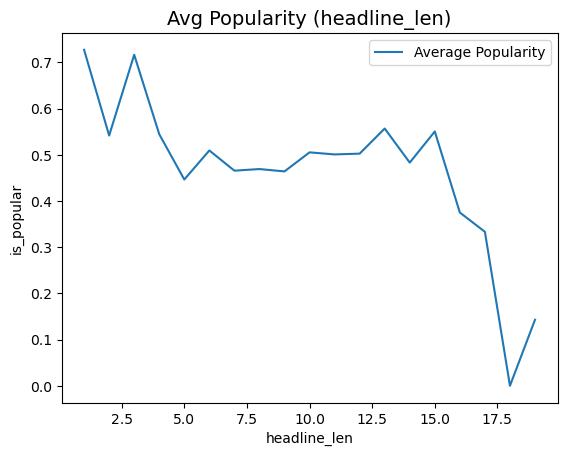

In [227]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('headline_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (headline_len)', fontsize=14)
print(test.corr()['is_popular']['headline_len'])

<font size=6>Abstract length</font>

-0.13335234517605316


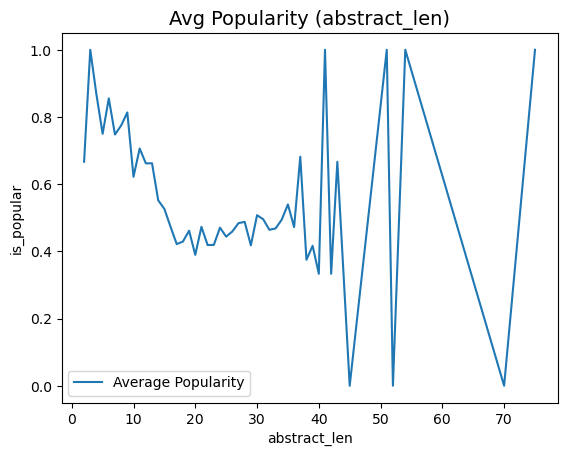

In [228]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('abstract_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_len)', fontsize=14)
print(test.corr()['is_popular']['abstract_len'])

<font size=6>Word count</font>

0.14519835784623675


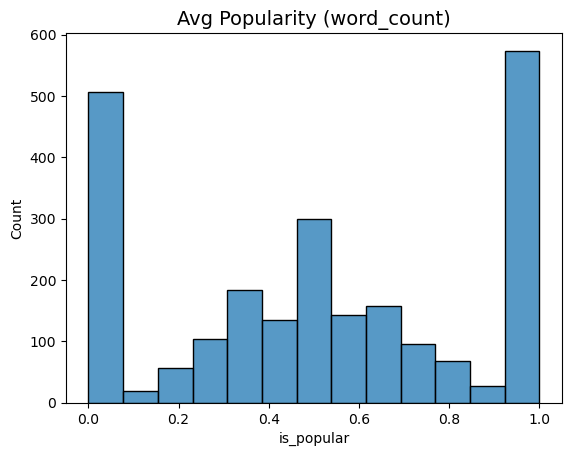

In [229]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.histplot(data = test.groupby('word_count').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (word_count)', fontsize=14)
print(test.corr()['is_popular']['word_count'])

0.08007004809725429


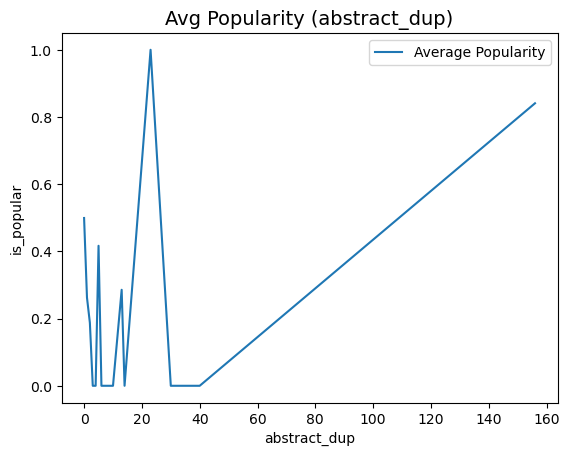

In [230]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('abstract_dup').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_dup)', fontsize=14)
print(test.corr()['is_popular']['abstract_dup'])

<font size=6>Lead paragraph length</font>

0.05418095748403394


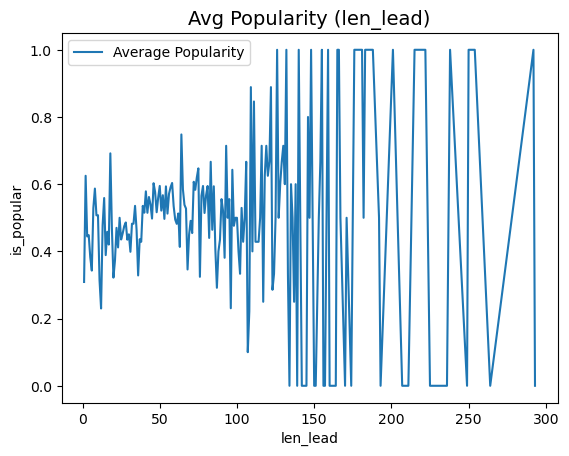

In [231]:
#print(test.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = test.groupby('len_lead').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (len_lead)', fontsize=14)
print(test.corr()['is_popular']['len_lead'])

<font size = 6>Sentiment analyze</font>

<font size = 5>punctuation removal</font>

In [232]:
punct_list = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
def remove_punctuation(headline):
    for punc in punct_list:
        if punc in headline:
            headline = headline.replace(punc, ' ')
    return headline
test['clean_headline'] = test['headline'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [233]:

text = "i am happy today."
blob = TextBlob(text)
# get the sentiment of the text
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [234]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
test['sentiment_tb_polar'] = test['clean_headline'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
test['sentiment_tb_polar_abs'] = test['sentiment_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
test['sentiment_tb_subj'] = test['clean_headline'].apply(lambda x : tb_score_subj(x))#0 ~ 1
test['sentiment_tb_pos'] = test['sentiment_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
print(test.corr()['is_popular']['sentiment_tb_polar'])
print(test.corr()['is_popular']['sentiment_tb_polar_abs'])
print(test.corr()['is_popular']['sentiment_tb_subj'])
print(test.corr()['is_popular']['sentiment_tb_pos'])

-0.029062963509785232
0.0031947539329904473
0.00212768521524864
-0.035296139127247834


<font size = 5>vader</font>

In [235]:
headline = 'today is a sunny day!'
analyzer = SentimentIntensityAnalyzer ()
sentiment_dict = analyzer.polarity_scores(headline)
print(sentiment_dict)

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4753}


In [236]:
test['sentiment_vader_neg'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
test['sentiment_vader_neu'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
test['sentiment_vader_pos'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
test['sentiment_vader_compound'] = test['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
test['sentiment_vader_compound_abs'] = test['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(test.corr()['is_popular']['sentiment_vader_neg'])
print(test.corr()['is_popular']['sentiment_vader_neu'])
print(test.corr()['is_popular']['sentiment_vader_pos'])
print(test.corr()['is_popular']['sentiment_vader_compound'])
print(test.corr()['is_popular']['sentiment_vader_compound_abs'])

0.10358049494222067
-0.09419947022620202
0.017444842168493402
-0.06287957255717222
0.06796986543034315


<font size = 5>snownlp</font>

In [237]:
headline = 'i am happy'
sentence = 'hello","why is it not working?!'
s = SnowNLP(headline)
print(s.sentiments)

0.1837233963534416


In [238]:
test['sentiment_snow'] = test['clean_headline'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
test['sentiment_snow_abs'] = test['sentiment_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
test['sentiment_snow_pos'] = test['sentiment_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(test.corr()['is_popular']['sentiment_snow'])
print(test.corr()['is_popular']['sentiment_snow_abs'])
print(test.corr()['is_popular']['sentiment_snow_pos'])

-0.010279464264863829
0.03613451047175644
0.02340617144533786


<font size = 6>abstract</font>

In [239]:
#test = test.drop(13348)
test['clean_abstract'] = test['abstract'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [240]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
test['sentiment_abstract_tb_polar'] = test['clean_abstract'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
test['sentiment_abstract_tb_polar_abs'] = test['sentiment_abstract_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
test['sentiment_abstract_tb_subj'] = test['clean_abstract'].apply(lambda x : tb_score_subj(x))#0 ~ 1
test['sentiment_abstract_tb_pos'] = test['sentiment_abstract_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
test['sentiment_abstract_tb_neg'] = test['sentiment_abstract_tb_polar'].apply(lambda x : 1 if x < 0 else 0)#bool
print(test.corr()['is_popular']['sentiment_abstract_tb_polar'])
print(test.corr()['is_popular']['sentiment_abstract_tb_polar_abs'])
print(test.corr()['is_popular']['sentiment_abstract_tb_subj'])
print(test.corr()['is_popular']['sentiment_abstract_tb_pos'])
print(test.corr()['is_popular']['sentiment_abstract_tb_neg'])

-0.03426351558745539
-0.028357269516843996
-0.013071059684906012
-0.06012244950954293
0.01223960504866077


<font size = 5>vader</font>

In [241]:
test['sentiment_abstract_vader_neg'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
test['sentiment_abstract_vader_neu'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
test['sentiment_abstract_vader_pos'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
test['sentiment_abstract_vader_compound'] = test['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
test['sentiment_abstract_vader_compound_abs'] = test['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(test.corr()['is_popular']['sentiment_abstract_vader_neg'])
print(test.corr()['is_popular']['sentiment_abstract_vader_neu'])
print(test.corr()['is_popular']['sentiment_abstract_vader_pos'])
print(test.corr()['is_popular']['sentiment_abstract_vader_compound'])
print(test.corr()['is_popular']['sentiment_abstract_vader_compound_abs'])

0.11059327709165943
-0.09900160193133965
0.025562223655309194
-0.06147055423205789
0.06796986543034315


<font size = 5>snownlp</font>

In [242]:
test['sentiment_abstract_snow'] = test['clean_abstract'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
test['sentiment_abstract_snow_abs'] = test['sentiment_abstract_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
test['sentiment_abstract_snow_pos'] = test['sentiment_abstract_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(test.corr()['is_popular']['sentiment_abstract_snow'])
print(test.corr()['is_popular']['sentiment_abstract_snow_abs'])
print(test.corr()['is_popular']['sentiment_abstract_snow_pos'])

0.09842255425125637
-0.11612763819445143
0.03067327132707528


In [243]:
fea_list = test.corr()['is_popular']
fea_list = fea_list.sort_values(key = lambda x : abs(x), ascending=False)
print(fea_list)

is_popular                               1.000000
n_comment                                0.539123
group_by_news_desk                       0.527370
feature_news_desk                        0.524634
group_by_section_name                    0.517452
feature_section_name                     0.514892
group_by_type_of_material                0.377672
feature_type_of_material                 0.377378
group_by_subsection_name                 0.316797
feature_subsection_name                  0.303671
is_president                             0.216381
is_party                                 0.186319
word_count                               0.145198
is_game                                  0.140814
abstract_len                            -0.133352
is_noon                                  0.133050
is_storm                                 0.116561
is_congress                              0.116174
sentiment_abstract_snow_abs             -0.116128
is_crossword                             0.114841


In [244]:

file = pd.read_pickle('./feature/feat_modified_v1.pkl')    
print(file.columns)
for col in test.columns:
    if col not in file.columns:
        test = test.drop(columns=col)  

Index(['word_count', 'pub_time', 'abstract_len', 'len_lead', 'is_popular',
       'is_noon', 'is_saturday', 'is_lowmonth', 'group_by_news_desk',
       'feature_news_desk', 'group_by_section_name', 'feature_section_name',
       'group_by_subsection_name', 'feature_subsection_name',
       'group_by_type_of_material', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_covid',
       'is_storm', 'is_spell', 'is_crossword', 'is_game',
       'sentiment_vader_neg', 'sentiment_vader_neu',
       'sentiment_vader_compound', 'sentiment_vader_compound_abs',
       'sentiment_snow_abs', 'sentiment_abstract_tb_subj',
       'sentiment_abstract_tb_pos', 'sentiment_abstract_vader_neg',
       'sentiment_abstract_vader_neu', 'sentiment_abstract_vader_pos',
       'sentiment_abstract_vader_compound',
       'sentiment_abstract_vader_compound_abs', 'sentiment_abstract_snow',
       'sentiment_abstract_snow_abs'],
      dtype='object')


In [245]:
print(test.corr()['is_popular'])

word_count                               0.145198
pub_time                                -0.027950
abstract_len                            -0.133352
len_lead                                 0.054181
is_popular                               1.000000
is_noon                                  0.133050
is_saturday                              0.096994
is_lowmonth                              0.069749
group_by_news_desk                       0.527370
feature_news_desk                        0.524634
group_by_section_name                    0.517452
feature_section_name                     0.514892
group_by_subsection_name                 0.316797
feature_subsection_name                  0.303671
group_by_type_of_material                0.377672
feature_type_of_material                 0.377378
is_party                                 0.186319
is_congress                              0.116174
is_president                             0.216381
is_ukrainian_russian_war                 0.056365


<AxesSubplot:>

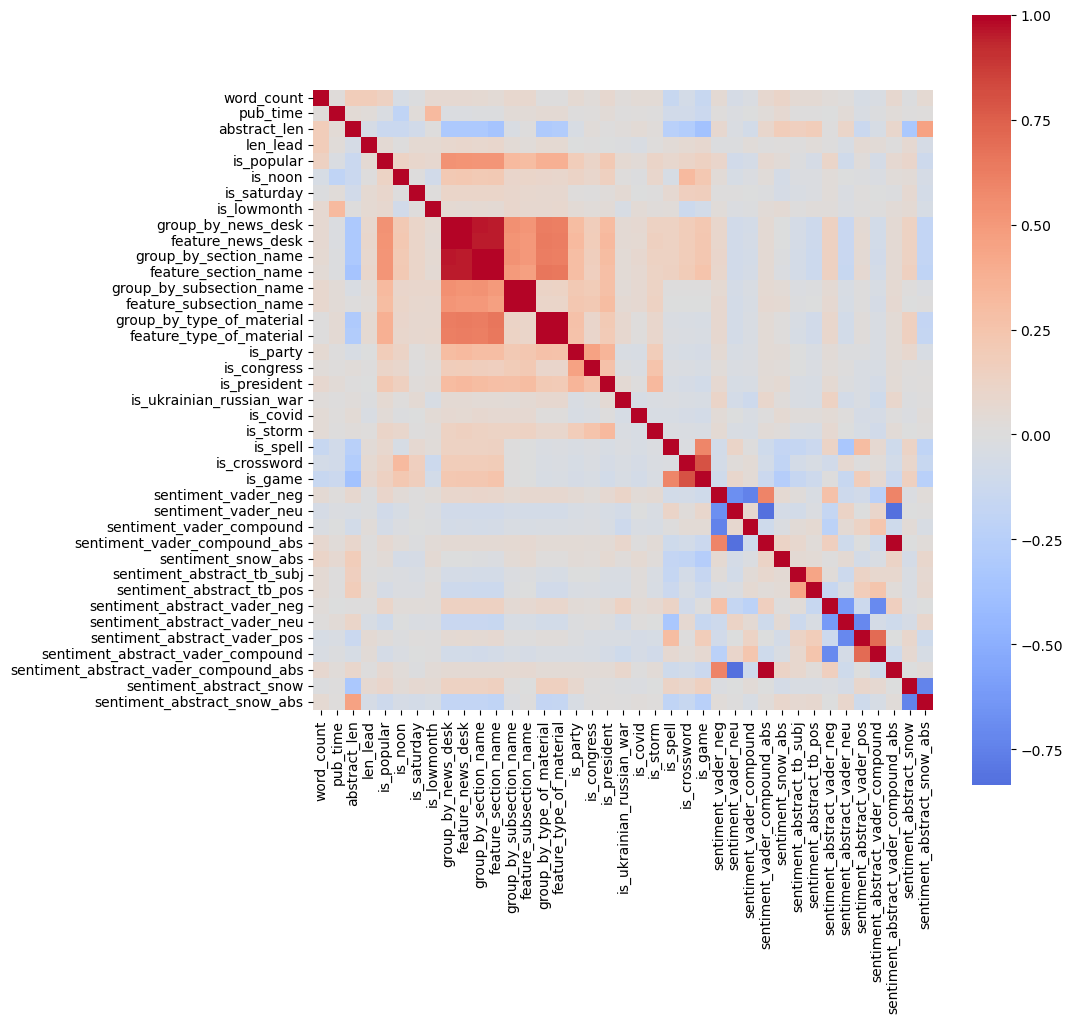

In [246]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center = 0)

In [247]:
'''  
test = test.drop(columns=['n_comment', 'group_by_news_desk', 'group_by_section_name', 'group_by_subsection_name',
                            'group_by_type_of_material', 'feature_news_desk', 'feature_subsection_name',
                            'sentiment_vader_neu', 'sentiment_vader_compound_abs', 'sentiment_abstract_snow',
                            'sentiment_abstract_vader_compound', 'sentiment_vader_compound', 'sentiment_abstract_vader_neu',
                            'is_game', 'sentiment_tb_pos', 'sentiment_abstract_tb_pos'])
test.columns
'''
            

"  \ntest = test.drop(columns=['n_comment', 'group_by_news_desk', 'group_by_section_name', 'group_by_subsection_name',\n                            'group_by_type_of_material', 'feature_news_desk', 'feature_subsection_name',\n                            'sentiment_vader_neu', 'sentiment_vader_compound_abs', 'sentiment_abstract_snow',\n                            'sentiment_abstract_vader_compound', 'sentiment_vader_compound', 'sentiment_abstract_vader_neu',\n                            'is_game', 'sentiment_tb_pos', 'sentiment_abstract_tb_pos'])\ntest.columns\n"

In [248]:
test.columns

Index(['word_count', 'pub_time', 'abstract_len', 'len_lead', 'is_popular',
       'is_noon', 'is_saturday', 'is_lowmonth', 'group_by_news_desk',
       'feature_news_desk', 'group_by_section_name', 'feature_section_name',
       'group_by_subsection_name', 'feature_subsection_name',
       'group_by_type_of_material', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_covid',
       'is_storm', 'is_spell', 'is_crossword', 'is_game',
       'sentiment_vader_neg', 'sentiment_vader_neu',
       'sentiment_vader_compound', 'sentiment_vader_compound_abs',
       'sentiment_snow_abs', 'sentiment_abstract_tb_subj',
       'sentiment_abstract_tb_pos', 'sentiment_abstract_vader_neg',
       'sentiment_abstract_vader_neu', 'sentiment_abstract_vader_pos',
       'sentiment_abstract_vader_compound',
       'sentiment_abstract_vader_compound_abs', 'sentiment_abstract_snow',
       'sentiment_abstract_snow_abs'],
      dtype='object')

<AxesSubplot:>

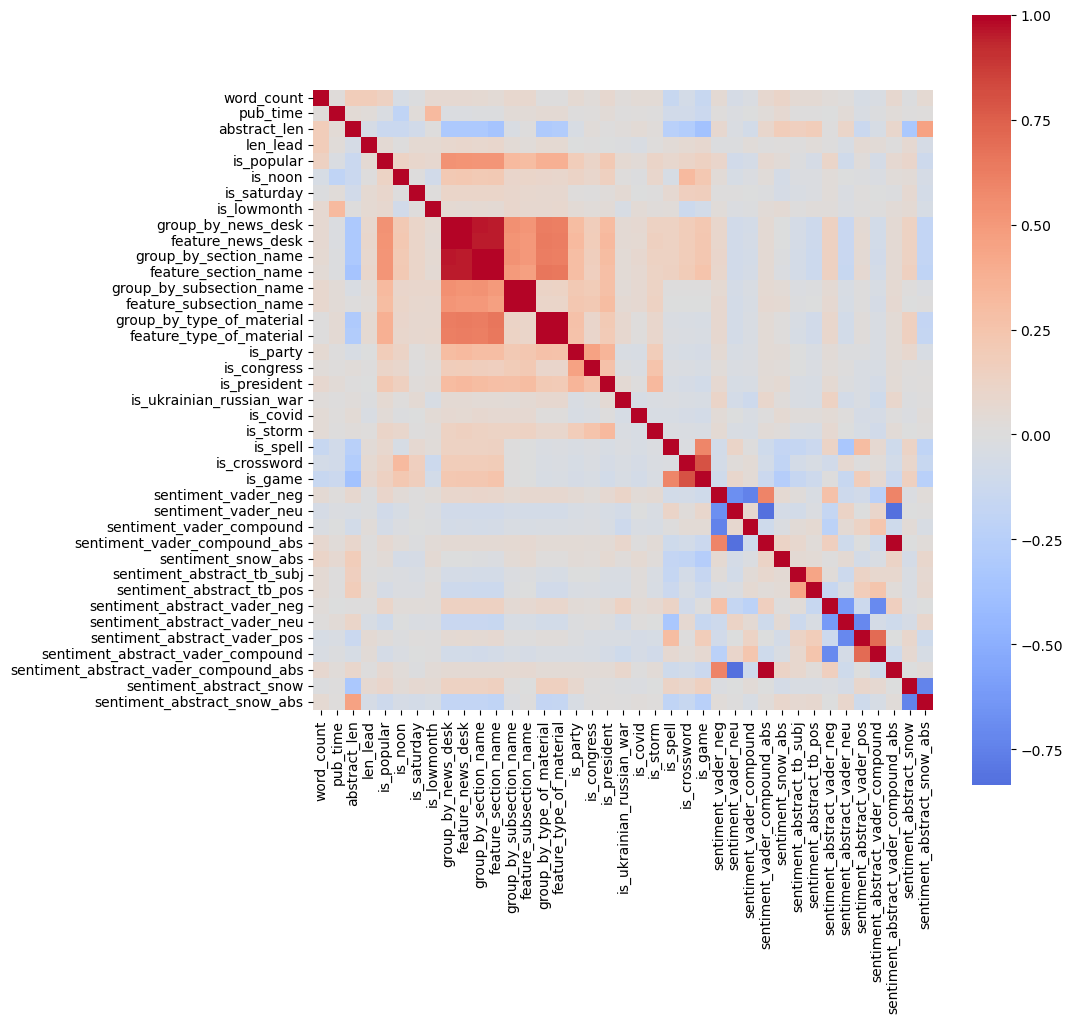

In [249]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center = 0)

<AxesSubplot:>

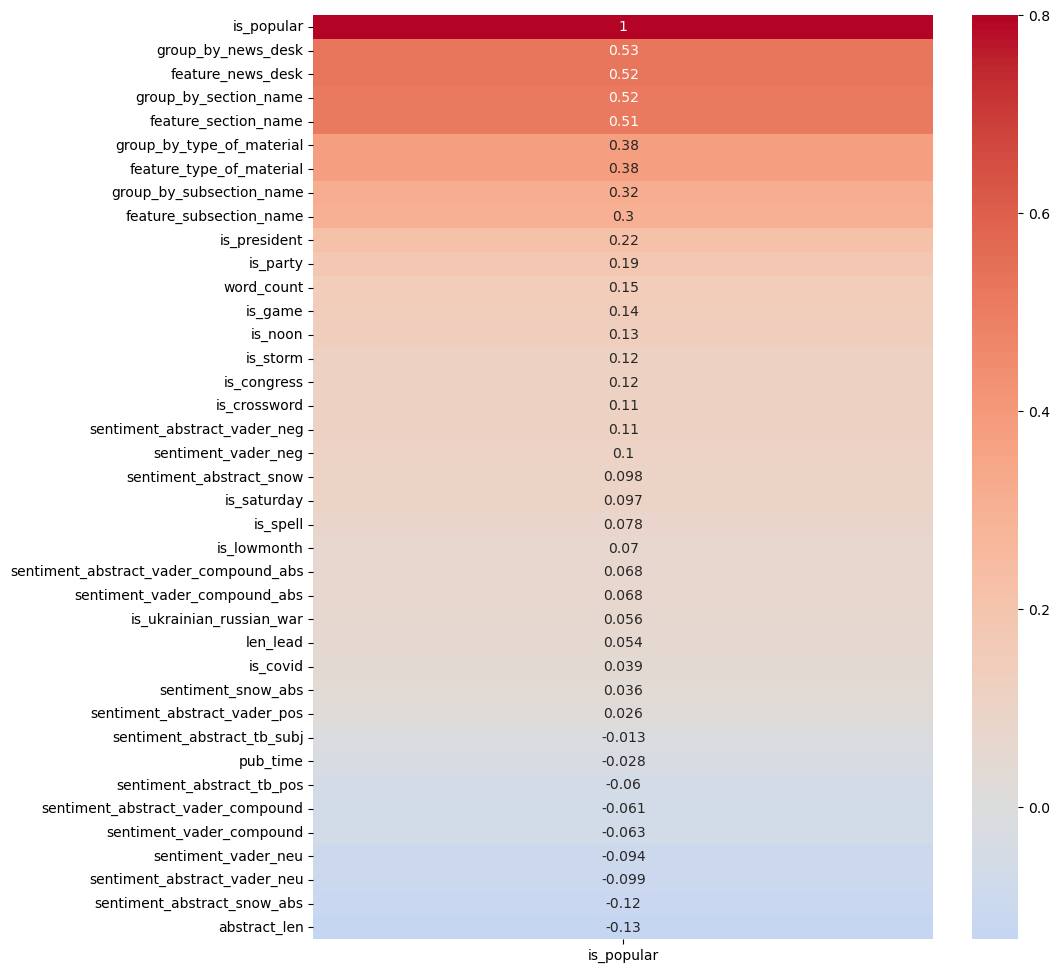

In [250]:
plt.figure(figsize=(10,12))
sns.heatmap(test.corr()[['is_popular']].sort_values(ascending=False, by='is_popular'), 
            cmap='coolwarm', annot=True, vmax=0.8, center=0)

# Check the features

In [251]:
if save:
    test.to_pickle(f'./feature/{feat_data}.pkl')
    feat = pd.read_pickle(f'./feature/{feat_data}.pkl')
print(feat.columns)
feat

Index(['word_count', 'pub_time', 'abstract_len', 'len_lead', 'is_popular',
       'is_noon', 'is_saturday', 'is_lowmonth', 'group_by_news_desk',
       'feature_news_desk', 'group_by_section_name', 'feature_section_name',
       'group_by_subsection_name', 'feature_subsection_name',
       'group_by_type_of_material', 'feature_type_of_material', 'is_party',
       'is_congress', 'is_president', 'is_ukrainian_russian_war', 'is_covid',
       'is_storm', 'is_spell', 'is_crossword', 'is_game',
       'sentiment_vader_neg', 'sentiment_vader_neu',
       'sentiment_vader_compound', 'sentiment_vader_compound_abs',
       'sentiment_snow_abs', 'sentiment_abstract_tb_subj',
       'sentiment_abstract_tb_pos', 'sentiment_abstract_vader_neg',
       'sentiment_abstract_vader_neu', 'sentiment_abstract_vader_pos',
       'sentiment_abstract_vader_compound',
       'sentiment_abstract_vader_compound_abs', 'sentiment_abstract_snow',
       'sentiment_abstract_snow_abs'],
      dtype='object')


,word_count,pub_time,abstract_len,len_lead,is_popular,is_noon,is_saturday,is_lowmonth,group_by_news_desk,feature_news_desk,...,sentiment_snow_abs,sentiment_abstract_tb_subj,sentiment_abstract_tb_pos,sentiment_abstract_vader_neg,sentiment_abstract_vader_neu,sentiment_abstract_vader_pos,sentiment_abstract_vader_compound,sentiment_abstract_vader_compound_abs,sentiment_abstract_snow,sentiment_abstract_snow_abs
0,670,3,18,74,1,1,0,0,0.777445,0.8,...,0.052466,0.640404,1,0.075,0.570,0.355,0.7506,0.4019,0.386396,0.227209
1,1541,8,29,58,1,0,0,1,0.379630,0.4,...,0.481656,0.734848,1,0.000,1.000,0.000,0.0000,0.4019,0.113273,0.773454
2,1322,10,19,23,1,0,0,1,0.740187,0.7,...,0.919421,0.500000,1,0.000,0.724,0.276,0.6249,0.1045,0.206117,0.587767
3,1920,10,28,66,1,0,0,1,0.561338,0.6,...,0.858612,0.416667,1,0.109,0.821,0.070,-0.0387,0.0000,0.009966,0.980068
4,1363,10,16,53,1,0,0,1,0.519562,0.5,...,0.111880,0.700000,1,0.000,0.870,0.130,0.2732,0.0000,0.136146,0.727709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,619,3,11,100,1,1,1,0,0.777445,0.8,...,0.052466,0.000000,0,0.000,0.682,0.318,0.6369,0.0000,0.223390,0.553220
9991,165,8,8,64,1,0,1,1,0.777445,0.8,...,0.104643,0.000000,0,0.179,0.446,0.375,0.2960,0.0000,0.396490,0.207019
9992,0,10,17,17,1,0,1,1,0.730769,0.7,...,0.520956,0.600000,1,0.293,0.475,0.232,-0.5468,0.0000,0.218673,0.562655
9993,2787,10,29,61,1,0,1,1,0.585034,0.6,...,0.156251,0.475000,1,0.000,0.837,0.163,0.6416,0.0000,0.271381,0.457238


Index([ 'print_section', 'print_page', 'pub_year',
       'abstract','abstract_dup', 'headline', 
       'headline_dup', 'headline_kicker', 'len_lead', 
       'is_popular'],
      dtype='object')